-- I have processed a data of images and wanna see if the features are correlated with each other or the target and reduce the feature creation as it is really costly !!!!


In [8]:
# Load the train file to take target and ids of images:
import pandas as pd

used_cols = ['item_id', 'user_id', 'deal_probability', 'image']
train = pd.read_csv('/media/bkd/ext01/train.csv', usecols=used_cols)
print(train.shape)
print(train['image'][0])
train['image'] = train['image'] + '.jpg'
print(train['image'][10])   
# run this once to correct the extensions in train.csv !!!!!!!!

(1503424, 4)
d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19
645d3fb949cb116a00c596ca1e168d8c5ddd21cdeacc5a26b711e3921a06f536.jpg


In [10]:
 print(train['image'][10000]) 

4271c355c839c00471798f26485dc0b84a3dae64262b07ea20d3aee99b065b73.jpg


In [7]:
features_img.head(10)
features_img['image'][0]
#train.keys()

'1000ebd4eee12d06d4dbcecf738d448e73076db1fd8baa73cd44e0a50e3043ca.jpg'

In [20]:

s1 = features_img.merge(train, on="image", how = 'inner')

In [22]:
s1.head()

,image,dullness,whiteness,average_pixel_width,dominant_color,dominant_red,dominant_green,dominant_blue,average_color,average_red,...,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image_top_1,deal_probability


In [70]:
features_img = pd.read_pickle("/home/bkd/Projects/kaggle_avito/codes/train_7_features")
train['image'][0]

'd10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19'

In [71]:
s1 = features_img.merge(train, on="image", how = 'inner')

In [72]:
s1.head()

,image,dullness,whiteness,average_pixel_width,dominant_color,dominant_red,dominant_green,dominant_blue,average_color,average_red,average_green,average_blue,image_size,temp_size,width,height,blurrness,item_id,user_id,deal_probability
0,005b26f685f0775460419064a977642f8b305fab46b239...,0.000,0.000,1.482928,"[182, 184, 184]",0.713725,0.721569,0.721569,"[176.54652777777778, 173.45981626157408, 171.3...",0.692339,0.680235,0.672007,26063,"(288, 480)",288,480,453.894890,9b663721150e,715477fb76ad,0.00000
1,006483c6a6fe0310307a160b44091a68884101e2eb74ce...,1.085,87.290,4.264122,"[252, 250, 252]",0.988235,0.980392,0.988235,"[202.9527485994398, 204.57533846872082, 210.17...",0.795893,0.802256,0.824219,30017,"(360, 476)",360,476,383.299961,a23da558a1ea,54a570932c79,0.00000
2,00bb3f8bd5487553018b66f475335e02693b50759f70f1...,0.000,0.000,2.193866,"[30, 54, 80]",0.117647,0.211765,0.313725,"[86.76873842592593, 105.68100694444445, 119.81...",0.340270,0.414435,0.469865,42412,"(360, 480)",360,480,256.957844,fc4910208524,913d35c78813,0.00000
3,00d4b4267560d6db37b24c3b6f6390d414f177fb8b70c9...,84.565,0.000,4.327546,"[12, 11, 14]",0.047059,0.043137,0.054902,"[79.5559201388889, 86.35101851851852, 86.74454...",0.311984,0.338631,0.340175,37463,"(360, 480)",360,480,632.225056,e04828936fc5,2fce002a0d21,0.76786
4,01294414ab83bcf6a288a330c66cedba61a047f970d036...,0.000,87.595,3.982253,"[252, 252, 252]",0.988235,0.988235,0.988235,"[206.67471450617285, 206.80244598765432, 206.9...",0.810489,0.810990,0.811755,29847,"(360, 360)",360,360,1654.581641,dd768b311a3a,de5e9cda4fb7,0.00000


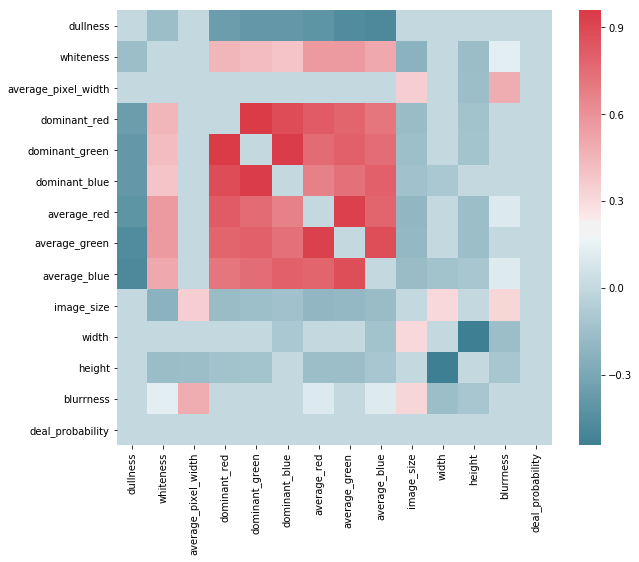

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = s1.corr()
corr[abs(corr)<.1]=0
corr[corr==1]=0
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

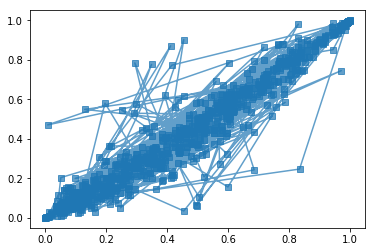

In [40]:
plt.plot(s1['dominant_green'],s1['dominant_red'],marker='s',alpha=.7)

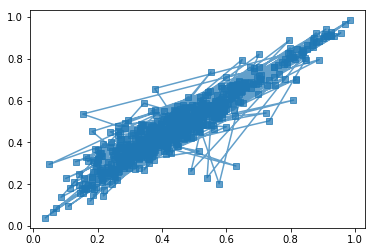

In [41]:
plt.plot(s1['average_red'],s1['average_green'],marker='s',alpha=.7)

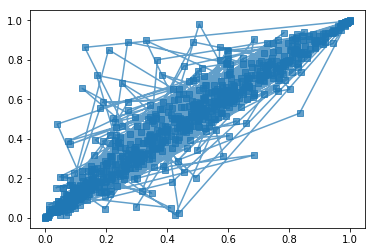

In [42]:
plt.plot(s1['dominant_green'],s1['dominant_blue'],marker='s',alpha=.7)

In [57]:
np.sqrt((s1['dominant_color'][100][0]**2 + s1['dominant_color'][100][1]**2 + s1['dominant_color'][100][2]**2)/3.0)

170.84983660122904

In [63]:
s1['dominant_color'][100][1
                         ]

167

In [62]:
np.std(s1['dominant_color'][100])

13.274871834493252

In [64]:
np.std(s1['average_color'][100])

16.389186660235207